<a href="https://colab.research.google.com/github/Vagarh/Job-Satisfaction-Prediction-with-ML/blob/main/Pycaret_ML_models_JobSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Aprendizaje Supervisado para la Predicion de la Satisfaccion Laboral 

####Objetivos 
Precedir la Satiafaccion del Trabajo mendiente la 
implementacion de dos modelos de aprendizaje  supervisado usando la libreria Pycaret


----------

 Acerca de PyCaret

PyCaret es una biblioteca de aprendizaje automático de código abierto y bajo código en Python que automatiza los flujos de trabajo de aprendizaje automático. Es una herramienta integral de aprendizaje automático y gestión de modelos que acelera exponencialmente el ciclo de experimentación.

En comparación con otras bibliotecas de aprendizaje automático de código abierto, PyCaret es una biblioteca alternativa de bajo código que se puede utilizar para sustituir cientos de líneas de código por unas pocas líneas. Esto hace que los experimentos sean exponencialmente rápidos y eficientes. PyCaret es esencialmente una envoltura de Python alrededor de varias bibliotecas de aprendizaje automático y marcos como scikit-learn, XGBoost, LightGBM, CatBoost, Optuna, Hyperopt, Ray, y algunos más.

Pros (PyCaret)


*   Facilita la implementacion de varios analisis con una linea de codigo
*   Optimiza tiempo al tener que ajustar los parametros . pycaret lo ejecuta automaticamente

*   Varias opciones para evaluar el modelo
*   Elemento de lista


Contras(PyCaret)
*   Caja negra de funcionamiento, no expone lo que esta pasando en la ejeucion
*   Podria hacer el proceso de aprendizaje superficial 

Para mas informacion sobre la libreria 
https://github.com/pycaret/pycaret
















# #### Plan de Trabajo

Se planteo el siguiente plan de accion para abordar el problema
este coolab solo se centrara en la fase de modelacion y evaluacion de resultados. 

La parte de analisis exploratorios y limpieza de datos se desarrollo en. https://github.com/Vagarh/Job-Satisfaction-Prediction-with-ML/blob/main/EDA_exploracion_y_limpieza_de_datos.ipynb

1.   Compresion de los datos


*   Descripcion de los datos
*   Exploracion de los datos
*   Verificacion de la calidad d elos datos


2.   Preparacion de los datos


3.   Modelado del ML


*   Seleccion de la Tecnicas de Modelos
*   Consturccion de Modelos
*   Evaluacion del modelos

4.  Evaluacion de los Resultados



















#  1. EDA Analisis exploratorio de los datos




In [1]:
from pycaret.datasets import get_data

In [2]:
%%capture
!pip install pandas_read_xml
 
# restart runtime after this install to allow Google colab to use the updated packages.

In [3]:
from google.colab import drive
drive.mount ("/gdrive")

Mounted at /gdrive


In [4]:
## importando librerias de uso general de manipulacion de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
## el data sett ya se encuentra normalizado y es producto del proceso de EDA que se realizo en el siguente jupyter https://github.com/Vagarh/Job-Satisfaction-Prediction-with-ML/blob/main/EDA_exploracion_y_limpieza_de_datos.ipynb
dataset = pd.read_excel("/content/JobSatisfactionNormalize.xlsx")

In [5]:
dataset.shape


(1470, 33)

## Preparacion de los Datos
En este caso no se tuvo que hacer manipulacion de datos faltantes. 


In [6]:
dataset.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Gender_Male                 0
Attrition_Yes               0
OverTime_Yes                0
dtype: int

Se realiza exploracion de datos y validacion de sus estadisticas se observa su std, min y max 

In [7]:
dataset.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.543197,0.501421,0.630272,0.292590,0.478231,0.550476,0.495339,0.573923,0.512731,...,0.28199,0.466553,0.587075,0.175204,0.234958,0.145850,0.242537,0.600000,0.161224,0.282993
std,0.217509,0.266085,0.288840,0.263896,0.289531,0.256041,0.266274,0.291255,0.364361,0.290420,...,0.19452,0.214878,0.235492,0.153163,0.201285,0.214829,0.209890,0.490065,0.367863,0.450606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.500000,0.259843,0.500000,0.035714,0.250000,0.400000,0.237179,0.333333,0.257143,...,0.15000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647,0.000000,0.000000,0.000000
50%,0.428571,0.500000,0.501074,0.500000,0.214286,0.500000,0.600000,0.493227,0.666667,0.514286,...,0.25000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471,1.000000,0.000000,0.000000
75%,0.595238,0.500000,0.755190,1.000000,0.464286,0.750000,0.800000,0.752177,1.000000,0.767857,...,0.37500,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
dataset.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes
0,0.547619,0.5,0.715820,1.0,0.000000,0.25,0.8,0.000000,0.333333,0.914286,...,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0,1,1
1,0.738095,1.0,0.126700,0.5,0.250000,0.00,0.8,0.000484,0.666667,0.442857,...,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,1,0,0
2,0.452381,0.5,0.909807,0.5,0.035714,0.25,0.2,0.001451,1.000000,0.885714,...,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1,1,1
3,0.357143,1.0,0.923407,0.5,0.071429,0.75,0.8,0.001935,1.000000,0.371429,...,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0,0,1
4,0.214286,0.5,0.350036,0.5,0.035714,0.00,0.4,0.002903,0.000000,0.142857,...,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,1,0,0



Se explora el conjunto de datos , para observar el tipo de los datos y en busqueda de daltantes

In [9]:
dataset.dtypes

Age                         float64
BusinessTravel              float64
DailyRate                   float64
Department                  float64
DistanceFromHome            float64
Education                   float64
EducationField              float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                     float64
JobSatisfaction             float64
MaritalStatus               float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction    float64
StandardHours                 int64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          

#Trainning Set Vs Test Set


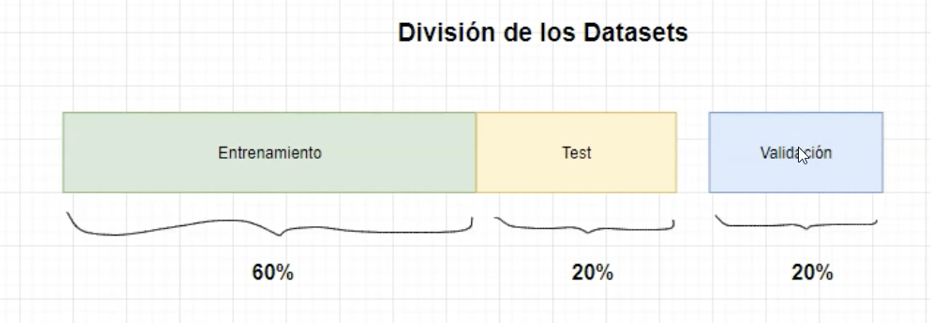

El datset se subdivide en tres set adicionales como expone la grafica anterior

1.  Data set de entrenamiento que tendra el 60% de los registros
2.  Data set de Prueba que tendra el 20% de los registros

estos dos seran utilizados en el proceso de Ml

3.  Data set de validacion  20% para una vez el modelo este listo probarlo con un conjunto de datos que el mismo no haya visto.



  



In [10]:
data=dataset.sample(frac=0.80, random_state=786 )

In [11]:
### data seet con el 80% de los datos con el cual se hara el entrenamiento y test del modelo
data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes
1122,0.261905,0.5,0.907659,0.5,0.071429,0.00,0.4,0.766812,0.333333,0.814286,...,0.250,0.500000,0.666667,0.250,0.500000,0.066667,0.294118,1,0,1
944,0.238095,0.0,0.983536,0.5,0.000000,0.50,0.8,0.635704,0.666667,0.357143,...,0.250,1.000000,0.666667,0.225,0.444444,0.466667,0.294118,0,0,0
398,0.452381,0.0,0.687903,0.5,0.857143,1.00,0.4,0.255443,0.333333,0.600000,...,0.375,0.333333,0.666667,0.325,0.611111,0.666667,0.411765,0,0,1
915,0.071429,1.0,0.106657,0.5,0.321429,0.25,0.8,0.618287,0.000000,0.214286,...,0.050,0.333333,0.000000,0.050,0.111111,0.133333,0.117647,0,1,0
588,0.761905,0.5,0.421618,0.5,0.035714,0.50,0.4,0.393807,0.666667,0.485714,...,0.750,0.500000,0.666667,0.100,0.166667,0.000000,0.176471,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.880952,0.5,0.740157,0.5,0.000000,0.75,0.4,0.688437,0.333333,0.728571,...,0.775,0.666667,1.000000,0.175,0.388889,0.000000,0.000000,1,0,0
186,0.523810,0.5,0.634932,0.5,0.107143,0.00,0.4,0.121916,1.000000,0.228571,...,0.525,0.333333,0.666667,0.500,0.444444,0.600000,0.529412,0,0,0
326,0.500000,1.0,0.408017,0.5,0.214286,0.25,0.4,0.214320,0.666667,0.342857,...,0.525,0.333333,0.666667,0.525,0.500000,0.866667,0.176471,1,0,0
913,0.642857,0.5,0.964209,1.0,0.035714,0.50,0.6,0.617320,0.000000,0.914286,...,0.650,0.333333,0.666667,0.600,0.555556,0.066667,0.647059,0,1,1


In [12]:
data_unsee=dataset.drop(data.index)

In [13]:
## muestra usada para validacion el cual representa el 20 de los datos 
data_unsee

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes
3,0.357143,1.0,0.923407,0.5,0.071429,0.75,0.8,0.001935,1.000000,0.371429,...,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000,0,0,1
5,0.333333,1.0,0.646385,0.5,0.035714,0.25,0.8,0.003387,1.000000,0.700000,...,0.200,0.333333,0.333333,0.175,0.388889,0.200000,0.352941,1,0,0
7,0.285714,0.5,0.899069,0.5,0.821429,0.00,0.8,0.004838,1.000000,0.528571,...,0.025,0.333333,0.666667,0.025,0.000000,0.000000,0.000000,1,0,0
11,0.261905,0.5,0.036507,0.5,0.500000,0.25,0.8,0.006773,1.000000,0.271429,...,0.250,0.500000,0.666667,0.225,0.277778,0.000000,0.470588,0,0,1
12,0.309524,0.5,0.406586,0.5,0.892857,0.00,0.8,0.007257,0.000000,0.014286,...,0.125,0.166667,0.333333,0.125,0.111111,0.266667,0.176471,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.428571,0.0,0.142448,1.0,0.500000,0.75,0.6,0.984519,1.000000,0.828571,...,0.375,0.666667,0.333333,0.375,0.666667,0.733333,0.647059,1,0,0
1448,0.547619,0.5,0.592699,1.0,0.071429,0.50,0.8,0.985002,0.666667,0.385714,...,0.350,0.833333,0.666667,0.125,0.222222,0.000000,0.235294,1,0,0
1453,0.428571,0.5,0.728704,1.0,0.357143,0.75,0.6,0.988873,0.333333,1.000000,...,0.200,0.333333,0.333333,0.150,0.166667,0.000000,0.000000,0,0,0
1463,0.309524,0.0,0.159628,0.5,0.142857,0.50,0.4,0.994678,0.333333,0.628571,...,0.250,0.333333,0.666667,0.225,0.222222,0.066667,0.411765,1,0,0


In [14]:
data.reset_index(inplace=True,drop=True)
data_unsee.reset_index(inplace=True,drop=True)

In [15]:
### 80 de dataset para modelacion de l ml
data.shape

(1176, 33)

In [16]:
## 20 de los datos al final de usarua a
data_unsee.shape
data_unsee

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes
0,0.357143,1.0,0.923407,0.5,0.071429,0.75,0.8,0.001935,1.000000,0.371429,...,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000,0,0,1
1,0.333333,1.0,0.646385,0.5,0.035714,0.25,0.8,0.003387,1.000000,0.700000,...,0.200,0.333333,0.333333,0.175,0.388889,0.200000,0.352941,1,0,0
2,0.285714,0.5,0.899069,0.5,0.821429,0.00,0.8,0.004838,1.000000,0.528571,...,0.025,0.333333,0.666667,0.025,0.000000,0.000000,0.000000,1,0,0
3,0.261905,0.5,0.036507,0.5,0.500000,0.25,0.8,0.006773,1.000000,0.271429,...,0.250,0.500000,0.666667,0.225,0.277778,0.000000,0.470588,0,0,1
4,0.309524,0.5,0.406586,0.5,0.892857,0.00,0.8,0.007257,0.000000,0.014286,...,0.125,0.166667,0.333333,0.125,0.111111,0.266667,0.176471,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.428571,0.0,0.142448,1.0,0.500000,0.75,0.6,0.984519,1.000000,0.828571,...,0.375,0.666667,0.333333,0.375,0.666667,0.733333,0.647059,1,0,0
290,0.547619,0.5,0.592699,1.0,0.071429,0.50,0.8,0.985002,0.666667,0.385714,...,0.350,0.833333,0.666667,0.125,0.222222,0.000000,0.235294,1,0,0
291,0.428571,0.5,0.728704,1.0,0.357143,0.75,0.6,0.988873,0.333333,1.000000,...,0.200,0.333333,0.333333,0.150,0.166667,0.000000,0.000000,0,0,0
292,0.309524,0.0,0.159628,0.5,0.142857,0.50,0.4,0.994678,0.333333,0.628571,...,0.250,0.333333,0.666667,0.225,0.222222,0.066667,0.411765,1,0,0


In [17]:
## Pycaret posee varios modulos de implementacion al observar Jobsatisfaction posee propiedades de una vairable continua por ello se escogera el modulo de regresion 
data_unsee["JobSatisfaction"].describe()

count    294.000000
mean       0.594104
std        0.354861
min        0.000000
25%        0.333333
50%        0.666667
75%        1.000000
max        1.000000
Name: JobSatisfaction, dtype: float64

#Modelacion de ML:Pycaret

## Configuracion del entorno de PYCARET
 Etapa de preparacion del ambiente de PYCARET

In [18]:
## Init setup PYCARET all modules de la libreria de modelos de regresion de Ml
from pycaret.regression import *

La función setup inicializa el entorno en pycaret y crea el pipeline para preparar los datos para el modelado y despliegue. Toma dos parámetros obligatorios: El dataframe (df)  y el nombre de la columna destino target( JobSatisfaction)

Cuando se ejecuta la configuración, el algoritmo de inferencia de PyCaret inferirá automáticamente los tipos de datos para todas las características basándose en las propiedades..

Una vez que la configuración se ha ejecutado correctamente, se muestra la tabla  de información, que contiene varios datos importantes. La mayor parte de la información está relacionada con el canal de preprocesamiento que se construye cuando se ejecuta la configuración. 
 algunas cosas importantes a tener en cuenta en esta etapa incluyen:


*   Numeric_features= se especifica que son variables numericas, el al algoritm de pycaret infiere el tipo de dato peroal realizar una etapa inical se encontro que el algoritmo incialmente detecto esas variables como categoricos aun cuando ya habien sido transformados 
*   Target=Vairable objetivo en este caso JobSatisfaction
*   normalize_metod=Define el método para el escalado. Por defecto, el método de normalización se establece en 'zscore'.en este caso de uso la opcion minmax
*   sesion_id= Controla la aleatoriedad del experimento. Es equivalente a 'random_state' en scikit-learn. Cuando  es None, se genera un número pseudoaleatorio, en este caso para dar reproduciiliad se asingo un valor 





In [19]:
from sklearn.preprocessing import minmax_scale
## el Parametro categorical_feature espeficia que valirbles son numeriva , el algoritmo infiere que tipo de varial
exp_name = setup(data = data, target='JobSatisfaction',numeric_features=["PerformanceRating","StandardHours","Gender_Male","Attrition_Yes", "OverTime_Yes","RelationshipSatisfaction"],session_id=123,normalize_method= "minmax")

,Description,Value
0,session_id,123
1,Target,JobSatisfaction
2,Original Data,"(1176, 33)"
3,Missing Values,False
4,Numeric Features,32
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(823, 32)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['PerformanceRating',
                                                          'StandardHours',
                                                          'Gender_Male',
                                                          'Attrition_Yes',
                                                          'OverTime_Yes',
                                                          'RelationshipSatisfaction'],
                                      target='JobSatisfaction',
                                      time_features=[])),
                ('imputer',
      

### Comparar modelos 

Luego el preprocesamiennto se usa el argumento " compare_model" para compara todos los modelos disponibles en pycaret en el modulo, evaluar  para su  rendimiento es el punto de partida recomendado para modelar una vez que se ha completado la configuración 
 
La salida imprime una tabla de puntuación que muestra el promedio de MAE, MSE,RMSE, R2, RMSLE MAPE parametros de calidad de evaluacion de un modelo de regresion.

En este caso tomare como criterio de evaluacion el RMSLE (Error cuadrático medio)  el cual mide cuan cerca estan los datos observados de los valores predichos , valores RMSE indican un mejor ajuste, el RMSE es una una buena medida de la precision con la que el modelo predice la respuesta.

In [20]:
best_model = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.3324,0.1435,0.3781,-0.0406,0.2621,0.3903,0.028
en,Elastic Net,0.3324,0.1435,0.3781,-0.0406,0.2621,0.3903,0.013
dummy,Dummy Regressor,0.3324,0.1435,0.3781,-0.0406,0.2621,0.3903,0.010
llar,Lasso Least Angle Regression,0.3324,0.1435,0.3781,-0.0406,0.2621,0.3903,0.012
br,Bayesian Ridge,0.3324,0.1439,0.3786,-0.0435,0.2625,0.3911,0.016
omp,Orthogonal Matching Pursuit,0.3317,0.1452,0.3803,-0.0525,0.2635,0.3920,0.013
ada,AdaBoost Regressor,0.3389,0.1466,0.3822,-0.0633,0.2623,0.4021,0.117
ridge,Ridge Regression,0.3325,0.1481,0.3841,-0.0757,0.2660,0.3957,0.033
lar,Least Angle Regression,0.3329,0.1487,0.3849,-0.0798,0.2664,0.3966,0.023
lr,Linear Regression,0.3329,0.1487,0.3849,-0.0798,0.2664,0.3966,0.849


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


Al analizar las metricas debo hacer  enfasis, y es **No podemos generalizar y los modelos de regresion deben ser evaluados bajo la prespectiva del dominio el cual se encuentran desplegados**, por ejemplo un modelo con un cierto error puede ser muy bueno para un despliegue de marketing el mismo muy malo en el financiero.



Ahora bien la tabla nos expone variables para evaluar el error cometido en la prediccion 


*   RMSE (root mean squared error)
*   MAE (mean abosulte error) 
*   RSE (relative squared error)
*   RAE (relative absolute error
*   Coeficiente  R2
*   MAPE (Mean Absolute Percentage Error)
*   RMSLE(Root Mean Squared Log Error)




Como crieterio de seleccion me basare en el RMSLE, midiendo la proporción entre la predicción y el actual,Un problema que existe con RMSE es la sensibilidad a los outliers, esto nos puede llevar a que el valor del error se incremente mucho. Al usar los logaritmos, los outliers se ven escalados por lo que evitamos ese efecto.

Con esta métrica entré más cercano sea el valor a 0, es mejor. Para nuestro ejemplo obtenemos un valor de 0.26 con los modelos "lasso" y "en"







In [21]:
## imprime los hiperparametos del mejor modelo de regresion al por medio de un scores al comprarlos con los demas
type(best_model)
print(best_model)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)


En esta etapa del proceso se han obtenido una valoracion inicial respecto a 17 tipos de modelos de regresion, tomando como criterio el RMSLE se decide seguir el procesos con los dos mejores basado en sus metricas Lasso Regression y Elastic Net.

El siguiente paso consiste en crear los modelos.

#Modelo 1 :Lasso Regression
 

Se implementa el argumento (create_model) para crear un modelo Lasso Regression 


##Train Sett

### Crear el Modelo: Create_Model

In [22]:
## train lasso model 
lasso_td= create_model("lasso")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3280,0.1338,0.3657,-0.1379,0.2343,0.4070
1,0.3105,0.1280,0.3578,-0.0143,0.2430,0.3735
2,0.3718,0.1693,0.4115,-0.0067,0.2904,0.4092
3,0.3740,0.1753,0.4186,-0.0584,0.3033,0.4008
4,0.3161,0.1376,0.3709,-0.0050,0.2638,0.3413
5,0.3138,0.1285,0.3585,-0.0493,0.2384,0.3763
6,0.3556,0.1581,0.3976,-0.0019,0.2784,0.4055
7,0.3007,0.1218,0.3490,-0.0114,0.2371,0.3729
8,0.3291,0.1472,0.3837,-0.1197,0.2811,0.4049


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [23]:
## Se imprimen los hiperparametros del modelo, pycaret hace un modelado estandar si bien se pueden personalizar 
##se dejo la configuracion por defecto

print(lasso_td)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)


### Optimizar el modelo:Tune_Model
Se usa la funcion " tunned_model" para ajustar los hiperparametros y  nos permite ver que hiperparametros se cambiaron respecto a la modelo inicial 

In [24]:
tunned_lasso=tune_model(lasso_td)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3280,0.1338,0.3657,-0.1379,0.2343,0.4070
1,0.3105,0.1280,0.3578,-0.0143,0.2430,0.3735
2,0.3718,0.1693,0.4115,-0.0067,0.2904,0.4092
3,0.3740,0.1753,0.4186,-0.0584,0.3033,0.4008
4,0.3161,0.1376,0.3709,-0.0050,0.2638,0.3413
5,0.3138,0.1285,0.3585,-0.0493,0.2384,0.3763
6,0.3556,0.1581,0.3976,-0.0019,0.2784,0.4055
7,0.3007,0.1218,0.3490,-0.0114,0.2371,0.3729
8,0.3291,0.1472,0.3837,-0.1197,0.2811,0.4049


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:Lasso(alpha=8.6, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [25]:
## imprimo los hiperparametros del modelo optimizado y se confronta su estado respecto al inicial "Lasso_Td"
print(tunned_lasso)

Lasso(alpha=8.6, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)


###Evaluar el Modelo:Evaluated_Model
Se implementa el argumento "Evaluated model" con el fin de generar graficas de las metricas para medir el desempeño del modelo generado 


In [26]:
evaluate_model(tunned_lasso)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=Lasso(alpha=8.6, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Finalizar el Modelo:Finalize_Model

In [27]:
final_lasso = finalize_model(lasso_td)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, m

In [28]:
print(final_lasso)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)


## Train set vs Test Set :Predict_Model

 
Durante todo este proceso solo se ha usado el 70% de los datos el train set ahora se procede a usar el 30% mendiente el precidto model 

In [29]:
predict_model(final_lasso)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.304,0.1253,0.354,-0.0005,0.2442,0.3773


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes,JobSatisfaction,Label
0,0.523810,0.5,0.244810,1.0,0.035714,0.25,0.6,0.960329,0.333333,0.885714,...,0.666667,0.275,0.444444,0.333333,0.588235,0.0,0.0,0.0,0.333333,0.571712
1,0.833333,0.5,0.361489,0.5,0.035714,1.00,0.0,0.760039,0.666667,0.685714,...,0.666667,0.825,0.388889,0.066667,0.529412,0.0,1.0,0.0,1.000000,0.571712
2,0.309524,0.5,0.064424,0.5,0.035714,0.75,0.8,0.205612,0.666667,0.028571,...,0.000000,0.050,0.111111,0.133333,0.117647,1.0,0.0,1.0,1.000000,0.571712
3,0.666667,0.5,0.431639,1.0,0.035714,0.75,0.6,0.017900,0.333333,0.757143,...,0.333333,0.050,0.111111,0.133333,0.058824,0.0,0.0,0.0,0.000000,0.571712
4,0.428571,1.0,0.381532,0.5,0.607143,0.00,0.4,0.137881,0.333333,0.614286,...,0.666667,0.200,0.055556,0.066667,0.411765,0.0,0.0,0.0,1.000000,0.571712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.595238,0.5,0.838225,0.5,0.035714,0.25,0.4,0.021771,1.000000,0.600000,...,0.333333,0.125,0.166667,0.066667,0.235294,0.0,0.0,0.0,0.666667,0.571712
349,0.214286,1.0,0.137437,0.5,0.321429,0.25,0.8,0.354136,1.000000,0.028571,...,0.333333,0.225,0.388889,0.066667,0.411765,1.0,0.0,0.0,0.000000,0.571712
350,0.047619,1.0,0.477452,1.0,0.285714,0.50,0.6,0.520561,1.000000,0.342857,...,0.666667,0.050,0.111111,0.000000,0.117647,0.0,1.0,1.0,1.000000,0.571712
351,0.476190,1.0,0.032928,0.5,0.035714,0.50,0.4,0.809869,1.000000,0.171429,...,0.666667,0.100,0.166667,0.200000,0.176471,0.0,0.0,0.0,0.333333,0.571712


## Model vs Unseen Data

La funcion predict model tambien se utilizar para predicir los resultado a partir de un argumento , al principio del ejercicio separamos un 20% de datos los cuales no fueron ingresados al modelo de entrenamiento, ahora es el momento de evaluar si el modelo frente a datos que nunca a ha visto que van bien es prediciendo y acertando los resultados

data_unsee = datos sin usar al principio del modelo


Al final obtendemos dos columnas luego de la columna objetivo , en este caso " Jobsatisfaction" y un SCORE, e score representa que tan acertado fue el modelo en hacer la prediccion.

In [30]:
prediction1=predict_model(final_lasso , data=data_unsee)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.3099,0.126,0.355,-0.004,0.2407,0.4067


In [31]:
predict_model(final_lasso, data=data_unsee)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.3099,0.126,0.355,-0.004,0.2407,0.4067


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes,Label
0,0.357143,1.0,0.923407,0.5,0.071429,0.75,0.8,0.001935,1.000000,0.371429,...,0.500000,0.666667,0.200,0.388889,0.200000,0.000000,0,0,1,0.571712
1,0.333333,1.0,0.646385,0.5,0.035714,0.25,0.8,0.003387,1.000000,0.700000,...,0.333333,0.333333,0.175,0.388889,0.200000,0.352941,1,0,0,0.571712
2,0.285714,0.5,0.899069,0.5,0.821429,0.00,0.8,0.004838,1.000000,0.528571,...,0.333333,0.666667,0.025,0.000000,0.000000,0.000000,1,0,0,0.571712
3,0.261905,0.5,0.036507,0.5,0.500000,0.25,0.8,0.006773,1.000000,0.271429,...,0.500000,0.666667,0.225,0.277778,0.000000,0.470588,0,0,1,0.571712
4,0.309524,0.5,0.406586,0.5,0.892857,0.00,0.8,0.007257,0.000000,0.014286,...,0.166667,0.333333,0.125,0.111111,0.266667,0.176471,1,0,0,0.571712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.428571,0.0,0.142448,1.0,0.500000,0.75,0.6,0.984519,1.000000,0.828571,...,0.666667,0.333333,0.375,0.666667,0.733333,0.647059,1,0,0,0.571712
290,0.547619,0.5,0.592699,1.0,0.071429,0.50,0.8,0.985002,0.666667,0.385714,...,0.833333,0.666667,0.125,0.222222,0.000000,0.235294,1,0,0,0.571712
291,0.428571,0.5,0.728704,1.0,0.357143,0.75,0.6,0.988873,0.333333,1.000000,...,0.333333,0.333333,0.150,0.166667,0.000000,0.000000,0,0,0,0.571712
292,0.309524,0.0,0.159628,0.5,0.142857,0.50,0.4,0.994678,0.333333,0.628571,...,0.333333,0.666667,0.225,0.222222,0.066667,0.411765,1,0,0,0.571712


In [32]:
## Visulizacion de metricas de lo prediccho
from pycaret.utils import check_metric
check_metric(prediction1.JobSatisfaction,prediction1.Label,"RMSE")

0.355

##Guardar el Modelo Final:Save Model

In [33]:
save_model(final_lasso,"Final_Lasso_Model_26Feb2023")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), model_name=Final_Lasso_Model_26Feb2023, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['PerformanceRating',
                                                          'StandardHours',
                                                          'Gender_Male',
                                                          'Attrition_Yes',
                                                          'OverTime_Yes',
                                             

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['PerformanceRating',
                                                           'StandardHours',
                                                           'Gender_Male',
                                                           'Attrition_Yes',
                                                           'OverTime_Yes',
                                                           'RelationshipSatisfaction'],
                                       target='JobSatisfaction',
                                       time_features=[])),
                 ('imputer',
                  Simple_...
                 ('fix_perfect', Remove_100(target='JobSatisfaction')),
    

## Cargar el Modelo de Regresion Lasso

In [34]:
saved_final_lasso=load_model("Final_Lasso_Model_26Feb2023")

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final_Lasso_Model_26Feb2023, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


# Modelo 2: Elastic Net

##Trains Sett

### Crear el Modelo:Create_Model

In [35]:
## train model 
en_modelo=create_model("en")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3280,0.1338,0.3657,-0.1379,0.2343,0.4070
1,0.3105,0.1280,0.3578,-0.0143,0.2430,0.3735
2,0.3718,0.1693,0.4115,-0.0067,0.2904,0.4092
3,0.3740,0.1753,0.4186,-0.0584,0.3033,0.4008
4,0.3161,0.1376,0.3709,-0.0050,0.2638,0.3413
5,0.3138,0.1285,0.3585,-0.0493,0.2384,0.3763
6,0.3556,0.1581,0.3976,-0.0019,0.2784,0.4055
7,0.3007,0.1218,0.3490,-0.0114,0.2371,0.3729
8,0.3291,0.1472,0.3837,-0.1197,0.2811,0.4049


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [36]:
### Visulizando los hyperparametros del modelo de regresion logistica
print(en_modelo)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)


### Optimizar el Modelo:Tune_Model

In [37]:
## Optimizando el modelo, mejorando los hyperparametros respecto a RMSE
tuned_en=tune_model(en_modelo, n_iter=50 , optimize= "RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3280,0.1338,0.3657,-0.1379,0.2343,0.4070
1,0.3105,0.1280,0.3578,-0.0143,0.2430,0.3735
2,0.3718,0.1693,0.4115,-0.0067,0.2904,0.4092
3,0.3740,0.1753,0.4186,-0.0584,0.3033,0.4008
4,0.3161,0.1376,0.3709,-0.0050,0.2638,0.3413
5,0.3138,0.1285,0.3585,-0.0493,0.2384,0.3763
6,0.3556,0.1581,0.3976,-0.0019,0.2784,0.4055
7,0.3007,0.1218,0.3490,-0.0114,0.2371,0.3729
8,0.3291,0.1472,0.3837,-0.1197,0.2811,0.4049


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:ElasticNet(alpha=4.35, copy_X=True, fit_intercept=True, l1_ratio=0.346,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [38]:
## imprimo los hiperparametors del modelo optimizado y comparo respecto al inicial
print(tuned_en)

ElasticNet(alpha=4.35, copy_X=True, fit_intercept=True, l1_ratio=0.346,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)


### Evaluar el Modelo:Evaluated_Model

In [39]:
## Evalua y grafica los el modelo optimizado de Regresion Logistica, se busca obtener varios graficos para ver el comportamiento del modelo 
evaluate_model(tuned_en)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ElasticNet(alpha=4.35, copy_X=True, fit_intercept=True, l1_ratio=0.346,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Finalizar el modelo:Finalize_Model

In [40]:
final_en=finalize_model(tuned_en)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ElasticNet(alpha=4.35, copy_X=True, fit_intercept=True, l1_ratio=0.346,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ElasticNet(alpha=4.35, copy_X=True, fit_intercept=True, l1_ratio=0.346,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=ElasticNet(alpha=4.35, copy_X=True, fit_intercept=True, l1_ratio=0.346,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), fold=None, round=4, cross_valid

## Train Sett vs Test Set:Predicto Model

In [41]:
predict_model(final_en)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ElasticNet(alpha=4.35, copy_X=True, fit_intercept=True, l1_ratio=0.346,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,0.304,0.1253,0.354,-0.0005,0.2442,0.3773


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes,JobSatisfaction,Label
0,0.523810,0.5,0.244810,1.0,0.035714,0.25,0.6,0.960329,0.333333,0.885714,...,0.666667,0.275,0.444444,0.333333,0.588235,0.0,0.0,0.0,0.333333,0.571712
1,0.833333,0.5,0.361489,0.5,0.035714,1.00,0.0,0.760039,0.666667,0.685714,...,0.666667,0.825,0.388889,0.066667,0.529412,0.0,1.0,0.0,1.000000,0.571712
2,0.309524,0.5,0.064424,0.5,0.035714,0.75,0.8,0.205612,0.666667,0.028571,...,0.000000,0.050,0.111111,0.133333,0.117647,1.0,0.0,1.0,1.000000,0.571712
3,0.666667,0.5,0.431639,1.0,0.035714,0.75,0.6,0.017900,0.333333,0.757143,...,0.333333,0.050,0.111111,0.133333,0.058824,0.0,0.0,0.0,0.000000,0.571712
4,0.428571,1.0,0.381532,0.5,0.607143,0.00,0.4,0.137881,0.333333,0.614286,...,0.666667,0.200,0.055556,0.066667,0.411765,0.0,0.0,0.0,1.000000,0.571712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.595238,0.5,0.838225,0.5,0.035714,0.25,0.4,0.021771,1.000000,0.600000,...,0.333333,0.125,0.166667,0.066667,0.235294,0.0,0.0,0.0,0.666667,0.571712
349,0.214286,1.0,0.137437,0.5,0.321429,0.25,0.8,0.354136,1.000000,0.028571,...,0.333333,0.225,0.388889,0.066667,0.411765,1.0,0.0,0.0,0.000000,0.571712
350,0.047619,1.0,0.477452,1.0,0.285714,0.50,0.6,0.520561,1.000000,0.342857,...,0.666667,0.050,0.111111,0.000000,0.117647,0.0,1.0,1.0,1.000000,0.571712
351,0.476190,1.0,0.032928,0.5,0.035714,0.50,0.4,0.809869,1.000000,0.171429,...,0.666667,0.100,0.166667,0.200000,0.176471,0.0,0.0,0.0,0.333333,0.571712


## Model vs Unseen Data

In [42]:
prediction2=predict_model(final_en, data =data_unsee)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ElasticNet(alpha=4.35, copy_X=True, fit_intercept=True, l1_ratio=0.346,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,0.3099,0.126,0.355,-0.004,0.2407,0.4067


Como crieterio de seleccion me basare en el RMSLE, midiendo la proporción entre la predicción y el actual.

Con esta métrica entré más cercano sea el valor a 0, es mejor. Para nuestra prediccion obtenemos un valor de 0.24 con el modelo al exponerlos frente a datos que nunca ha visto

In [43]:
check_metric(prediction2.JobSatisfaction,prediction2.Label,"RMSLE")

0.2407

##Guardar el Modelo Final:

In [44]:
save_model(final_en,"Final_Elastic_Model_26Feb2023")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ElasticNet(alpha=4.35, copy_X=True, fit_intercept=True, l1_ratio=0.346,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), model_name=Final_Elastic_Model_26Feb2023, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['PerformanceRating',
                                                          'StandardHours',
                                                          'Gender_Male',
                                                          'Attrition_Yes',
                                                          'OverTime_Yes',
           

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['PerformanceRating',
                                                           'StandardHours',
                                                           'Gender_Male',
                                                           'Attrition_Yes',
                                                           'OverTime_Yes',
                                                           'RelationshipSatisfaction'],
                                       target='JobSatisfaction',
                                       time_features=[])),
                 ('imputer',
                  Simple_...
                 ('clean_names', Clean_Colum_Names()),
                 ('fe

##Cargar el Modelo de Elastic Net

In [45]:
saved_final_Elastic=load_model("Final_Elastic_Model_26Feb2023")

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final_Elastic_Model_26Feb2023, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


Se evaluea el modelo mendiente un analisis e curva ROC la grafica muestra que el modelo posee bajas caractericas de prediccion

#Conclusiones



*   Se obtuvo dos modelos implementados mediante la libreria pycaret el primer modelo corresponde a un modelo de regresion de Lasso y el segundo un Elastic Net se evaluao su rendimiento mediente la metrica RSMLE obtiendiendo valores cercanos a cero (0.2)
*   La libreria Pycaret facilito el proceso se implementacion y evaluacion de varios modleos de Ml si bien puede aparentar ser una herramienta de uso para pricipiantes , posee todo un conjunto de parametros que permite hacer ajustes personalizados de los hiperparametros
*   La librerya Pycaret permitido optimizar el tiempo ya que algo que tomaria de realizar en mas lineas de codigo se ejeucuto en menos






Bibliografia



*   https://www.pycaret.org/tutorials/html/CLF101.html
*   @Manual {PyCaret, 
    title = {PyCaret: An open source, low-code machine learning library in Python}, 
    author = {Moez Ali}, 
    year = {2020}, 
    month = {April}, 
    note = {PyCaret version 1.0}, 
    url = {https://www.pycaret.org
    }

